### Algerian Forest Fire Model Creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("Algerian_forest_fire_cleaned.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
# drop the day month and year
data.drop(['day','month','year'], axis=1, inplace=True)
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
data['Classes'] = np.where(data['Classes'].str.contains('not fire'),0,1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [7]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
data.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [9]:
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
x = data.drop('FWI',axis=1) # independent feature
y = data['FWI'] # dependent feature

In [11]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [13]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((194, 11), (49, 11), (194,), (49,))

In [15]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

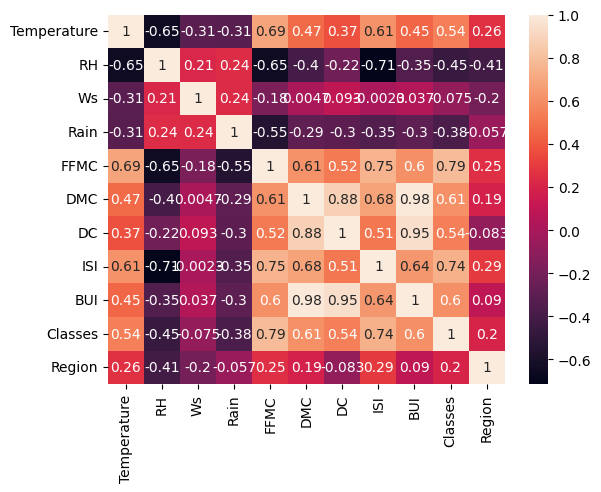

In [16]:
sns.heatmap(x_train.corr(), annot=True)

If two features are highly correlated then we can drop one feature

so multi-colinearity exist

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]>threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(x_train, 0.85)
corr_features

{'BUI', 'DC'}

In [19]:
# drop the feature where correlation is > 0.85
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)
x_train.shape, x_test.shape

((194, 9), (49, 9))

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
x_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]], shape=(194, 9))

Text(0.5, 1.0, 'x_train after scale')

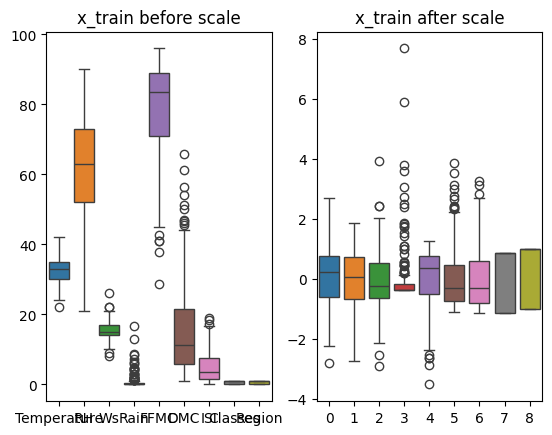

In [22]:
# Box plots to understand the effects of Scaler
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scale")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train after scale")

In [23]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Accuracy: {score * 100}% ")

MSE: 0.5882990110708648
MAE: 0.5049978694165663
Accuracy: 98.05895859259883% 


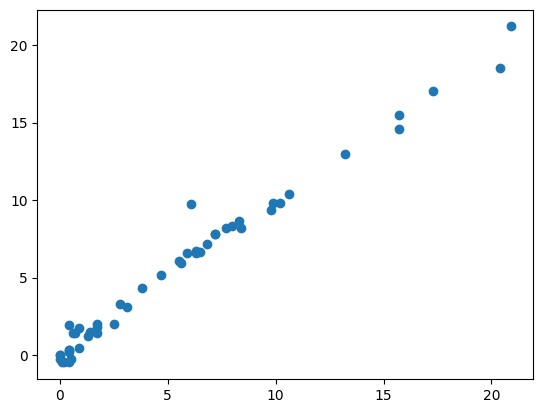

In [25]:
plt.scatter(y_test,y_pred)

#### Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [28]:
y_pred_lasso = lasso.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
score = r2_score(y_test, y_pred_lasso)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Accuracy: {score * 100}% ")

MSE: 1.726042325023142
MAE: 1.0093958923873407
Accuracy: 94.30507350726562% 


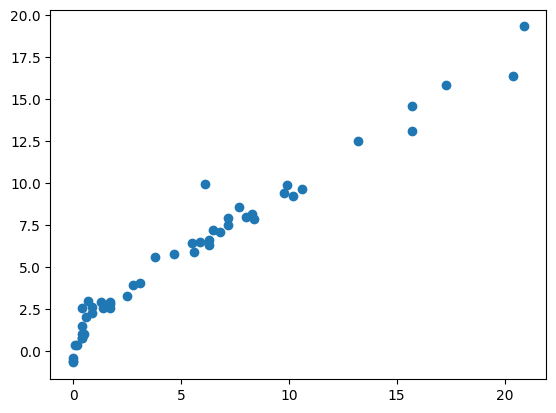

In [29]:
plt.scatter(y_test,y_pred_lasso)


### Cross Validation Lasso

In [30]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5) # training dataset will be divided by 5 --> cv data --> model accuracy will be avg of all cv avgs
lassocv.fit(x_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [31]:
lassocv.alpha_

np.float64(0.04391080246587261)

MSE: 0.6568370026125329
MAE: 0.5556715031617872
Accuracy: 97.8328234520343% 


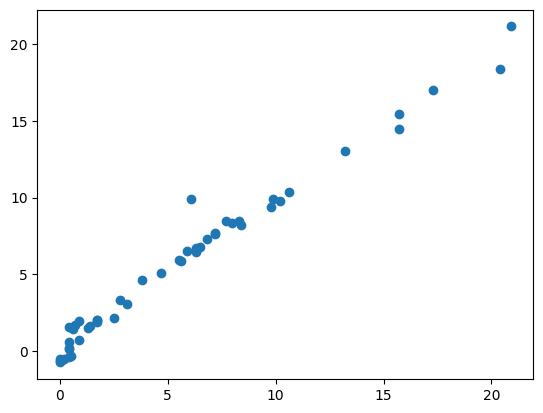

In [33]:
y_pred_lassocv = lassocv.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred_lassocv)
mae = mean_absolute_error(y_test, y_pred_lassocv)
score = r2_score(y_test, y_pred_lassocv)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Accuracy: {score * 100}% ")
plt.scatter(y_test, y_pred_lassocv)

### Ridge Regression Model

MSE: 0.6029616070548557
MAE: 0.5192048325844728
Accuracy: 98.01058063273602% 


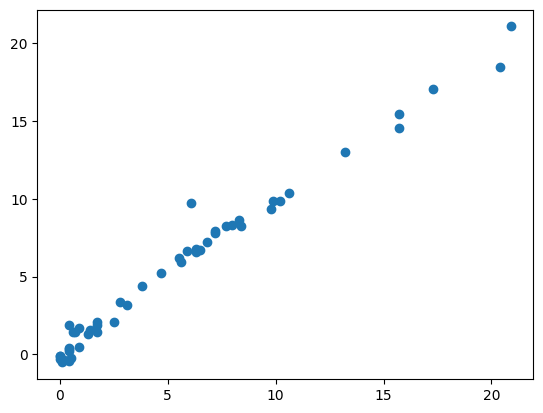

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred_ridge=ridge.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
score = r2_score(y_test, y_pred_ridge)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Accuracy: {score * 100}% ")
plt.scatter(y_test, y_pred_ridge)


### ElasticNet Regression

MSE: 4.009921298441002
MAE: 1.6834416340136709
Accuracy: 86.76961352267807% 


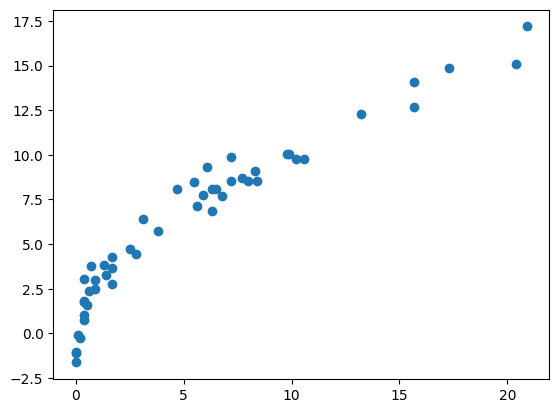

In [37]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled, y_train)
y_pred_elastic = elasticnet.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred_elastic)
mae = mean_absolute_error(y_test, y_pred_elastic)
score = r2_score(y_test, y_pred_elastic)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Accuracy: {score * 100}% ")
plt.scatter(y_test, y_pred_elastic)


MSE: 0.6637102658943733
MAE: 0.5710147088777218
Accuracy: 97.81014571778188% 


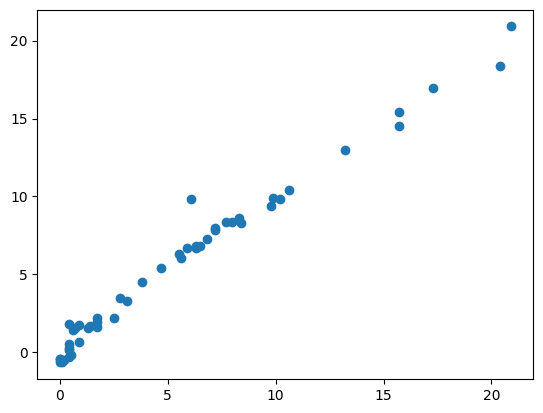

In [38]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(x_train_scaled, y_train)
y_pred_elasticcv = elasticnetcv.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred_elasticcv)
mae = mean_absolute_error(y_test, y_pred_elasticcv)
score = r2_score(y_test, y_pred_elasticcv)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Accuracy: {score * 100}% ")
plt.scatter(y_test, y_pred_elasticcv)

In [39]:
# pickle the machine learning models, preprocessing model standscalers
scaler


,copy,True
,with_mean,True
,with_std,True


In [40]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [41]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))


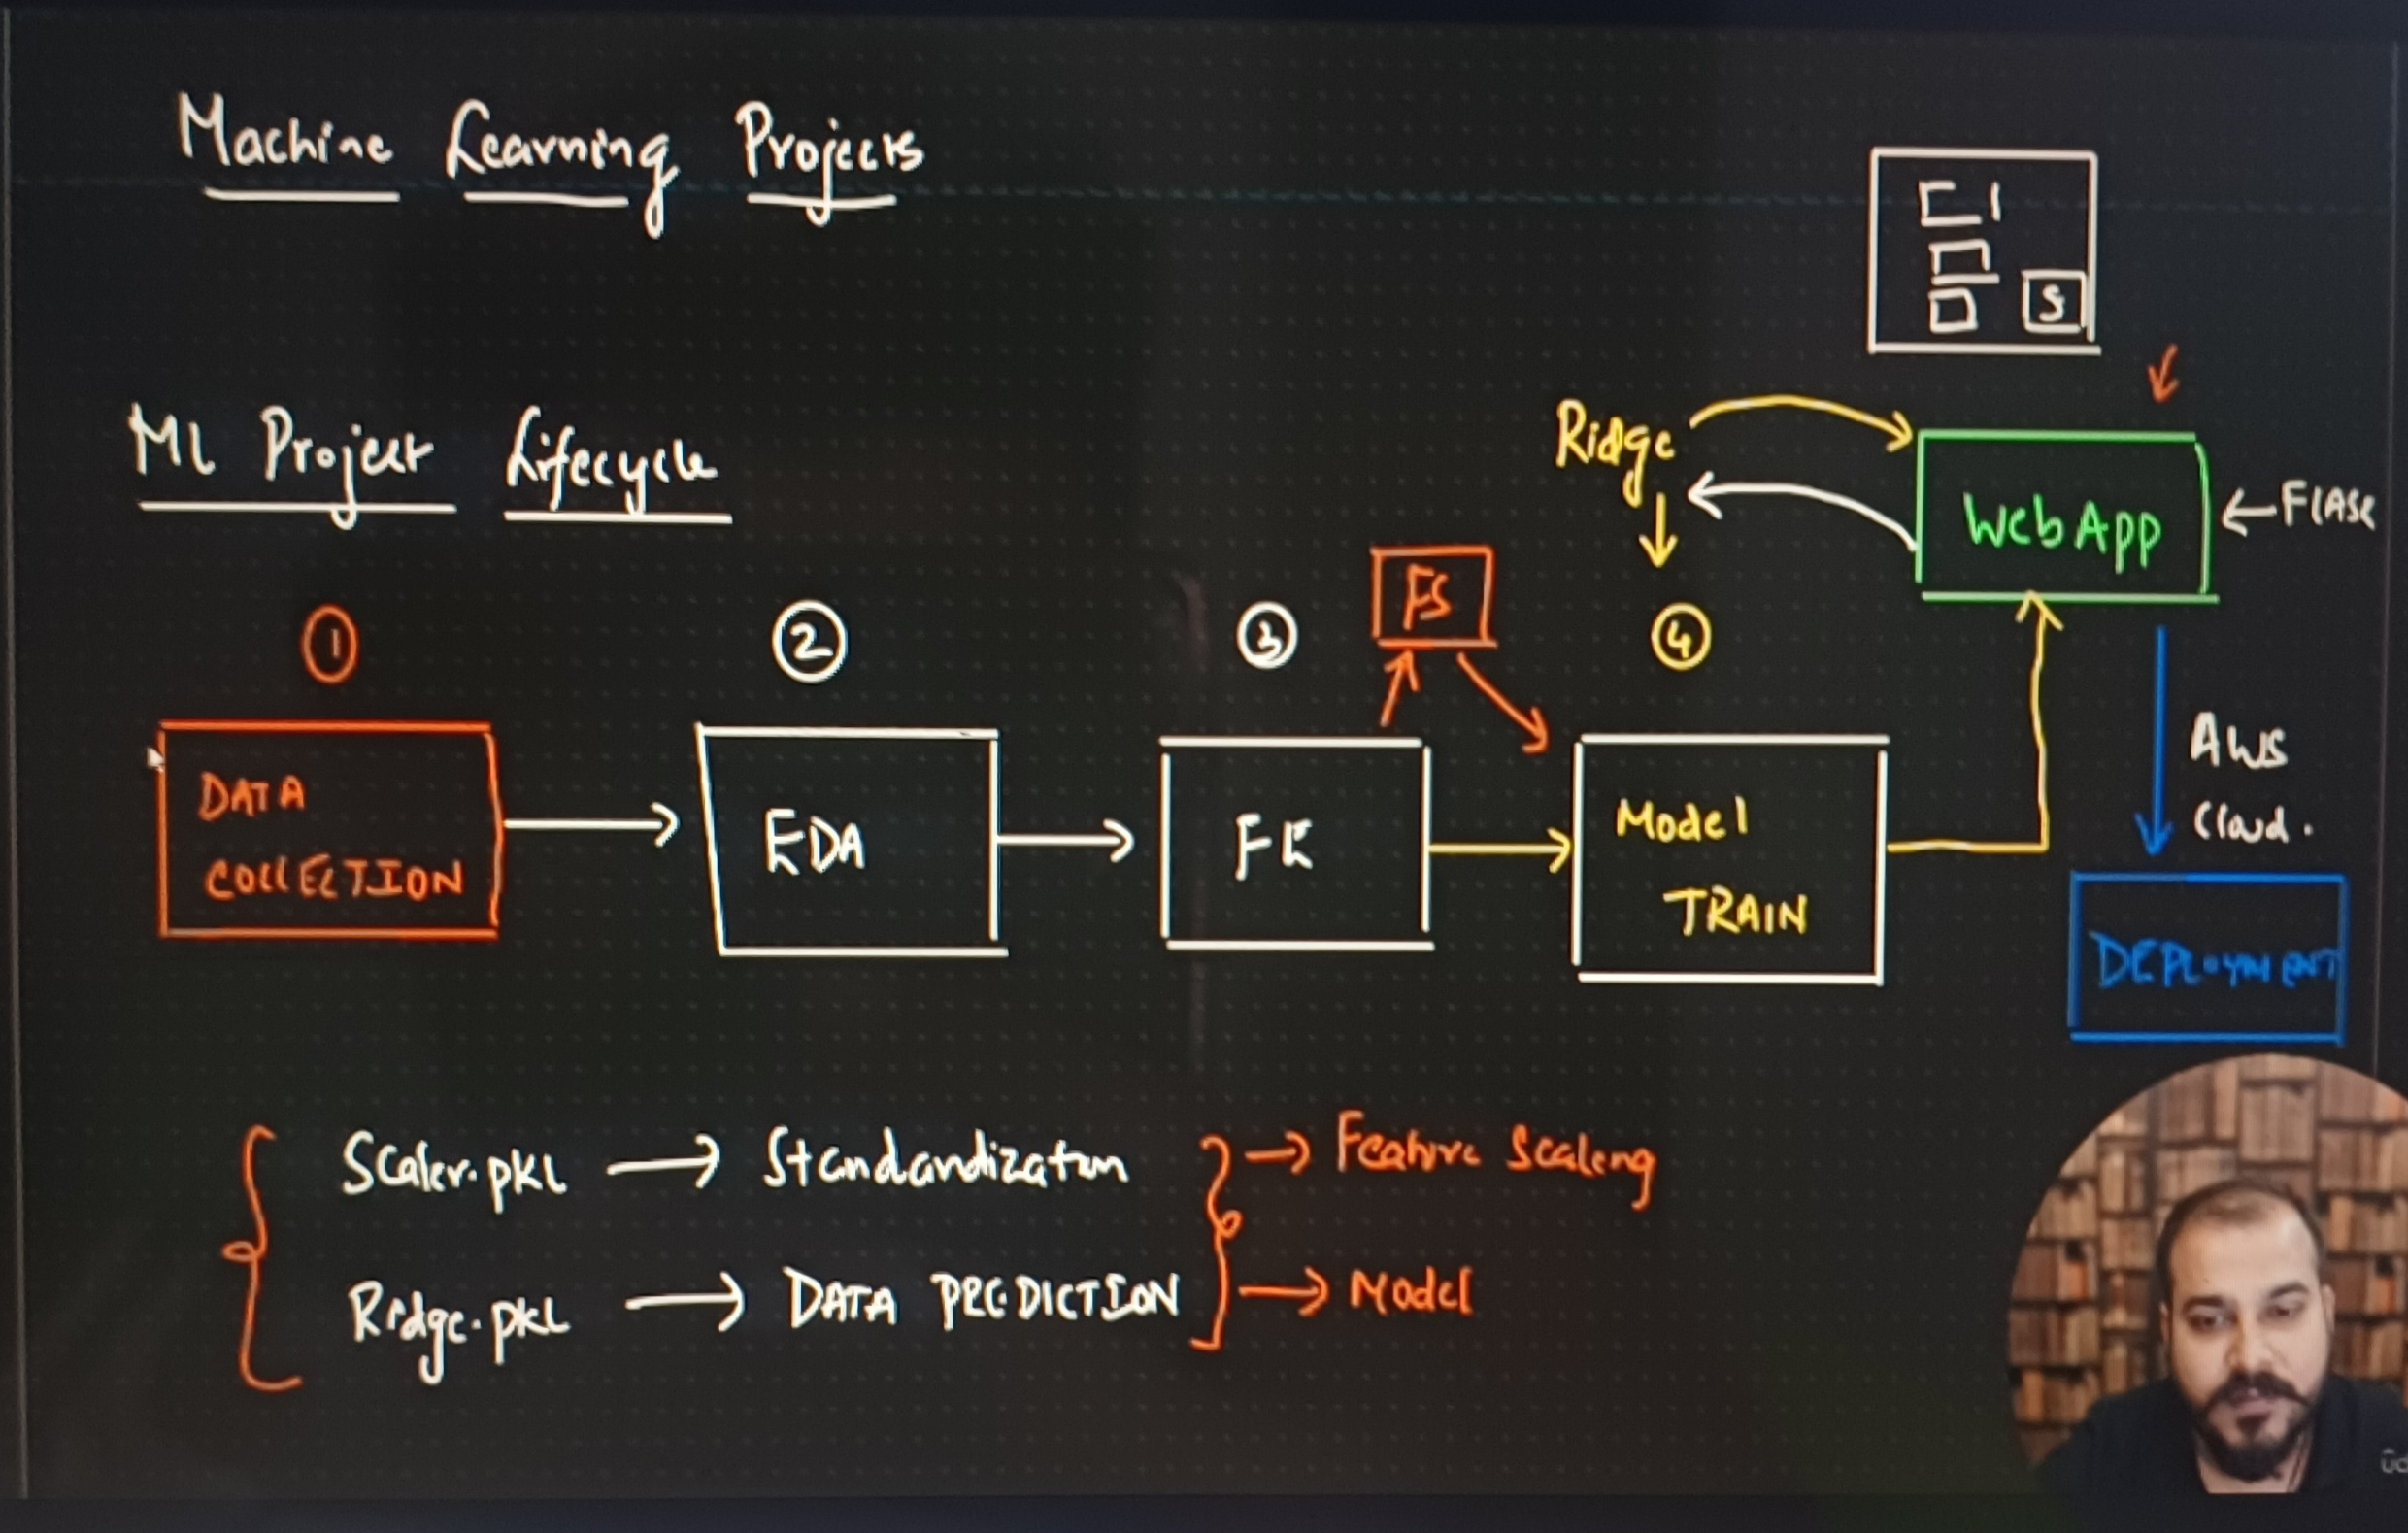